In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
warnings.filterwarnings("ignore") 
from pandas.plotting import scatter_matrix 

In [2]:
resumeDataSet = pd.read_csv("training_resume_data.csv") 
resumeDataSet.head()

,Text,Skills
0,Tax ID :45-5189216\nemail ID ...,"['account', 'routing', 'hr']"
1,--\nThanks and Regards\nShilpa Maheshwari\nHea...,['web']
2,Consultant Details \n\n\tConsultant Name\n\tLu...,"['consultant', 'visa', 'pleasanton', 'backend'..."
3,First Name \n\tShahbaz Ahmed \n\tLast Name\n\t...,"['unit', 'qa', 'software', 'consultant', 'hr']"
4,"About Bitsoft International, Inc:\n\n\n\nBitso...","['services', 'information', 'erp', 'business',..."


In [3]:
test=pd.read_csv("testing_resume.csv")
test.head()

,Text
0,"Thank you,\nVamsi Krishna Gudisay\nPh: 408-338..."
1,Praveen Sai\nSalesforce developer\nPhone: (510...
2,676 Mineral Point Drive (913) 206-5713 ...
3,Contact\n\nSkills\n\nLanguages\n\nWork History...
4,Steve Wilson Wells Fargo references 2010 thr...


In [4]:
words=list(resumeDataSet['Skills'].values)
lst = []
for i in words:
    sent = i.strip('][').split(', ')
    for j in sent:
        lst.append(j)

lst1 = []
for i in lst:
    word = i.strip("''")
    lst1.append(word)
    
unique = list(set(lst1))

In [76]:
lst = []
for i in words:
    sent = i.strip('][').split(', ')
    for j in sent:
        lst.append(j)

In [80]:
lst1 = []
for i in lst:
    word = i.strip("''")
    lst1.append(word)

In [87]:
len(lst1)

193066

In [84]:
unique = list(set(lst1))

In [5]:
len(unique)

1827

In [6]:
print(unique)

['database', 'jni', 'tech lead', 'odbc', 'performance tuning', 'exchange server', 'aix', 'analyzer', 'animation', 'scm', 'oracle identity', 'jquery ajax', 'pre-sales', 'microsoft excel', 'adobe flex', 'pci', 'flash', 'digital marketing', '.net', 'microstrategy', 'postgressql', 'switch', 'data integration', 'ms-dos', 'shipping', 'ips', 'predictive modelling', 'software testing life cycle', 'sprint', 'hitachi', 'bmc remedy', 'six', 'mapreduce', 'k8s', 'joomla', 'ansible', 'jet', 'workflows', 'tomcat', 'soa', 'packaging', 'r programming', 'dell', 'jmeter', 'arm', 'cognos', 'groupwise', 'data factory', 'hcm', 'data loader', 'forgerock', 'erp', 'cloud computing', 'visual design', 'unified communications', 'yarn', 'corba', 'trouble shooting', 'data architect', 'adobe fireworks', 'cloud services', 'commission', 'automation testing', 'vulnerabilities', 'ids', 'system admin', 'vb', 'pivot table', 'ln', 'oem', 'integration', 'ms sql server 2012', 'spark', 'debian', 'browsers', 'active directory 

In [4]:
skills=[]
for i in resumeDataSet.Skills:
    skills.append(i.strip("[]"))

In [92]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*',' ', resumeText) # remove URLS 
#     resumeText = re.sub('RT|',' ', resumeText) # remove RT and cc 
    resumeText = re.sub('#\S+', '', resumeText) # remove hashtags 
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ', resumeText) # remove punctuations
    resumeText = re.sub('\s+',' ', resumeText) # remove extra whitespace 
    resumeText = re.sub('@\S+', '', resumeText) # remove mentions
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    return resumeText
    
test['Text'] = test.Text.apply(lambda x: cleanResume(x))

In [93]:
test

,Text
0,Thank you Vamsi Krishna Gudisay Ph 408 338 855...
1,Praveen Sai Salesforce developer Phone 510 858...
2,676 Mineral Point Drive 913 206 5713 Frisco Te...
3,Contact Skills Languages Work History Educatio...
4,Steve Wilson Wells Fargo references 2010 thru ...
...,...
496,Vikas D ravitejan softworldusa com 469 983 143...
497,VENKATA Venkata Panchumarthi pvs012 gmail com ...
498,Vishal Kumar Currently pursuing Ph D in Inform...
499,India Resume Format PREMA KUMAR VEERAPANENI Mo...


In [95]:
text=[]
for i in range(len(test)):
    text.append(test["Text"][i])

In [ ]:
text

[('using', 331), ('data', 298), ('com', 280), ('2019', 253), ('testing', 248), ('2020', 218), ('team', 218), ('management', 212), ('University', 207), ('test', 185), ('Management', 180), ('I', 173), ('new', 172), ('issues', 171), ('support', 170), ('business', 170), ('software', 169), ('SQL', 168), ('IT', 165), ('1', 164), ('2018', 163), ('Microsoft', 163), ('Data', 162), ('Experience', 160), ('2017', 151), ('Project', 151), ('gmail', 150), ('project', 150), ('experience', 148), ('Engineer', 145), ('Test', 143), ('May', 141), ('Software', 135), ('2', 133), ('development', 132), ('system', 129), ('Engineering', 126), ('2016', 124), ('3', 124), ('process', 121), ('work', 120), ('skills', 120), ('reports', 120), ('Worked', 119), ('A', 118), ('customer', 117), ('2021', 116), ('Science', 116), ('requirements', 113), ('Developed', 112)]


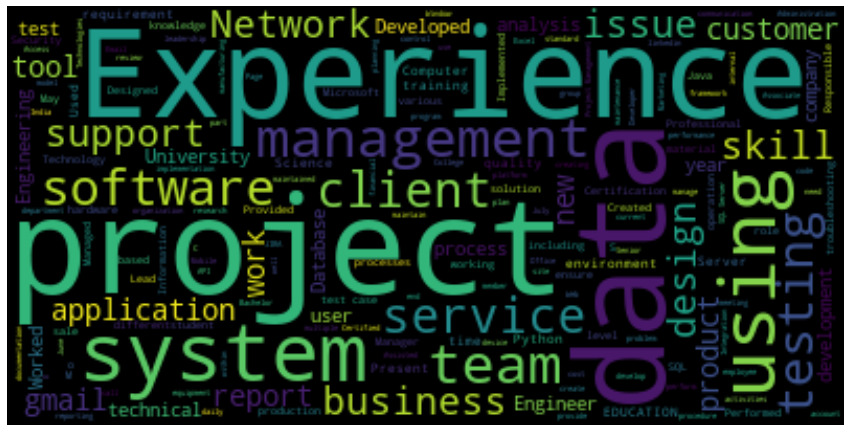

In [97]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"]) 
totalWords =[]
Sentences = test['Text'].values 
cleanedSentences = ""


for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredwords = nltk.word_tokenize (cleanedText)

    for word in requiredwords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences) 
plt.figure(figsize=(15,15)) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis("off")
plt.show()

In [ ]:
import nltk

SKILLS_DB = unique
 
def extract_skills(input_text):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    word_tokens = nltk.tokenize.word_tokenize(input_text)
 
    # remove the stop words
    filtered_tokens = [w for w in word_tokens if w not in stop_words]
 
    # remove the punctuation
    filtered_tokens = [w for w in word_tokens if w.isalpha()]
 
    # generate bigrams and trigrams (such as artificial intelligence)
    bigrams_trigrams = list(map(' '.join, nltk.everygrams(filtered_tokens, 2, 3)))
 
    # we create a set to keep the results in.
    found_skills = set()
 
    # we search for each token in our skills database
    for token in filtered_tokens:
        if token.lower() in SKILLS_DB:
            found_skills.add(token)
 
    # we search for each bigram and trigram in our skills database
    for ngram in bigrams_trigrams:
        if ngram.lower() in SKILLS_DB:
            found_skills.add(ngram)
 
    return found_skills

In [115]:
skills = []
for i in range(len(test)):
    if __name__ == '__main__':
        texts=text
        skills.append(list(extract_skills(texts[i])))

In [110]:
created_test = test.copy()
created_test

In [116]:
created_test["Skills_Extracted"] = skills

In [117]:
created_test

,Text,Skills_Extracted
0,Thank you Vamsi Krishna Gudisay Ph 408 338 855...,"[web, sql]"
1,Praveen Sai Salesforce developer Phone 510 858...,"[PM, Salesforce, visa]"
2,676 Mineral Point Drive 913 206 5713 Frisco Te...,"[Customer Service, managed, Managed, Business,..."
3,Contact Skills Languages Work History Educatio...,"[Java, SCM, Certified, Jenkins, SpringBoot, Li..."
4,Steve Wilson Wells Fargo references 2010 thru ...,"[Program Manager, deployment, Program, iis, We..."
...,...,...
496,Vikas D ravitejan softworldusa com 469 983 143...,"[Java Servlets, Batch, prototyping, Web, Conti..."
497,VENKATA Venkata Panchumarthi pvs012 gmail com ...,"[Cash, Oracle SQL, SCM, Management, Citibank, ..."
498,Vishal Kumar Currently pursuing Ph D in Inform...,"[elastic search, Oracle SQL, Backend Testing, ..."
499,India Resume Format PREMA KUMAR VEERAPANENI Mo...,"[elastic search, Oracle SQL, marketing, Manage..."
